# <font color="#00308F"><b> **Project Name    - Netflix Movies and TV Shows Clustering**

### <font color="#00308F"><b>  **Project Type -**    <font color="#20c997"><b> Unsupervised Clustering and Recommendation System

### <font color="#00308F"><b>  **Contribution -**    <font color="#20c997"><b> Individual

# <font color="#00308F"><b> **Github Link -**

https://github.com/shubh4866/Netflix-Movies-and-TV-Shows-Clustering.git

# <font color="Indianred"><b> **Project Summary -**

The objective of this project is to examine Netflix's collection of movies and TV shows, sourced from the third-party search engine Flixable, and categorize them into meaningful clusters. This analysis aims to improve user experience and reduce subscriber churn for Netflix, the largest online streaming service, with over 220 million subscribers as of the second quarter of 2022. The dataset, covering movies and TV shows up to 2019, will be explored to identify emerging patterns and insights in the fast-evolving streaming entertainment industry.

* The dataset contained around 7,787 records and 12 attributes.

* We began by addressing the missing values and performing exploratory data analysis (EDA).

* To create clusters, we focused on attributes such as cast, country, genre, director, rating, and description. The TFIDF vectorizer was employed to tokenize, preprocess, and vectorize the data from these attributes.

* Dimensionality reduction was tackled using Principal Component Analysis (PCA).

* We used various methods, including the elbow method, silhouette score, dendrogram, and others, to build two different types of clusters using the K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, determining the optimal number of clusters.

* To develop a content-based recommender system, we applied cosine similarity to generate a similarity matrix, which provided ten recommendations for the user based on the type of show they watched.

## <font color="Indianred"><b> **1. Problem Statement**

Netflix is a streaming platform offering a wide range of television shows and movies that viewers can watch at their convenience with a monthly subscription. Subscribers gain access to a vast library of content, including original series and films produced by Netflix. The platform allows users to create multiple profiles, making it easy for families or roommates to enjoy a personalized viewing experience. Additionally, Netflix offers the ability to download content for offline viewing, making it an ideal option for those who travel frequently or have limited internet access. Overall, Netflix provides a convenient and affordable way to access diverse entertainment options.

As of the second quarter of 2022, more than 220 million people had subscribed to Netflix, making it the largest OTT provider globally. To enhance the user experience and reduce subscriber churn, it is essential for Netflix to efficiently categorize and cluster the shows available on their platform.

By grouping similar shows together, we can gain a better understanding of the relationships between different titles. These clusters will help provide personalized recommendations to users based on their viewing preferences.

This project aims to classify and group Netflix shows into specific clusters, ensuring that shows within the same cluster are alike, while those in different clusters are distinct from one another.

## <font color="Indianred"><b> **2. Know Your Data**

## <font color="#20c997"><b> Import Libraries

In [1]:
# Import Libraries and Modules

# Data Analysis and Visualization:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

# Word Cloud:
from wordcloud import WordCloud, STOPWORDS

# Text Processing:
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Implement Clustering:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Recommendation System:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS
import re

import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import plotly.express as px



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

# load the data set from the drive
df = pd.read_csv('/content/drive/MyDrive/Almabetter_Projects/Machine_Learning/ML Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Dataset Rows & Columns
df.shape

(7787, 12)

In [5]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Check for null values.
null_percentage = df.isna().mean() * 100
null_columns = null_percentage[null_percentage > 0]
print('Percentage of null values :-')
for col, percentage in null_columns.items():
    print(f' {col}: {round(percentage,1)}%')


Percentage of null values :-
 director: 30.7%
 cast: 9.2%
 country: 6.5%
 date_added: 0.1%
 rating: 0.1%


In [7]:
# duplicate values
df.duplicated().sum()

0

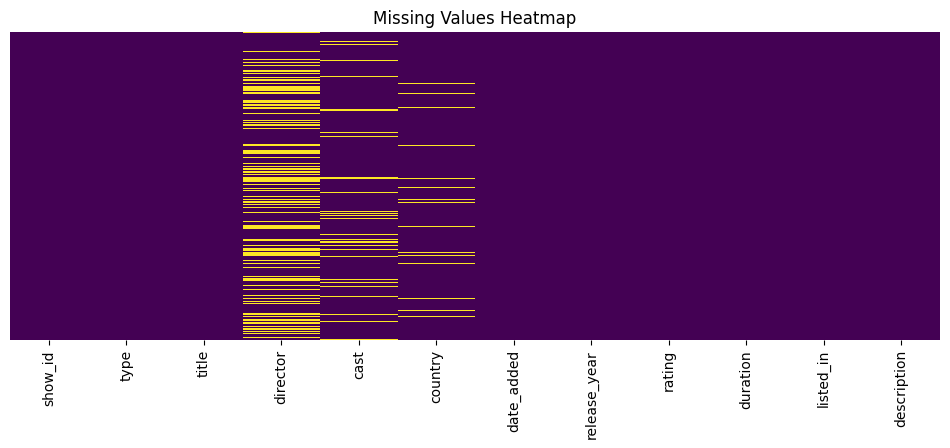

In [8]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 4))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## <font color="#20c997"><b> About Dataset

The dataset, derived from the online streaming industry, contains 7,787 rows and 12 columns. It provides information about various movies, but certain columns, such as director, cast, country, date_added, and rating, have missing values. However, there are no duplicate entries in the dataset.

Each row corresponds to a specific movie, making it challenging to use traditional imputation techniques for missing values. Since the dataset is relatively small and losing any data could be detrimental, the approach taken is to impute missing numeric values with an empty string after analyzing each column. This ensures that we retain the data while addressing the missing values in a way that does not impact the analysis.

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### <font color="#20c997"><b> Variables Description
* **show_id:** Unique ID for every Movie/Show
* **type:** Identifier - Movie/Show
* **title:** Title of the Movie/Show
* **director:** Director of the Movie/Show
* **cast:** Actors involved in the Movie/Show
* **country:** Country where the Movie/Show was produced
* **date_added:** Date it was added on Netflix
* **release_year:** Actual Release year of the Movie/Show
* **rating:** TV Rating of the Movie/Show
* **duration:** Total Duration - in minutes or number of seasons
* **listed_in:** Genre
* **description:** The Summary description

In [10]:
# Check Unique Values for each columns.
unique_values = df.apply(lambda x: x.nunique())
print(unique_values)

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


# <font color="Indianred"><b> Exploratory Data Analysis

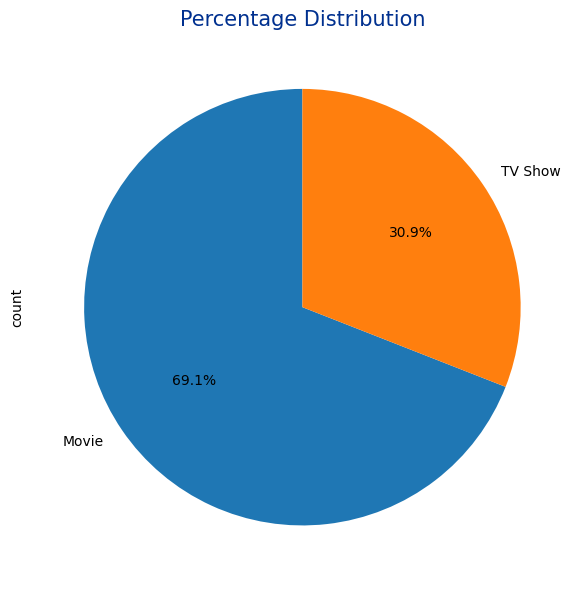

In [11]:
# categories types
fig, ax = plt.subplots(figsize=(15,6))  # specify the size of the figure
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax, startangle=90)
plt.title('Percentage Distribution', color='#00308F', size=15)
plt.tight_layout()
plt.show()

### <font color="Indianread"><b> **Observations:**

* Movies have a higher count than TV Shows in the dataset.
* 31% of the data consists of TV Shows, while 69% of the data consists of Movies.

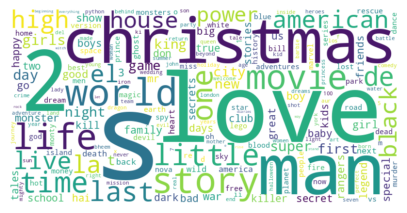

In [12]:
# number of unique values in title

# Preprocess the text to remove special characters
text = " ".join(word for word in df['title'])

# Remove stopwords and non-alphabetic characters
words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [word for word in words if word not in STOPWORDS]
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plotting
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### <font color="Indianread"><b> **Observations:**

* Common words such as 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' appear frequently in the movie title column.

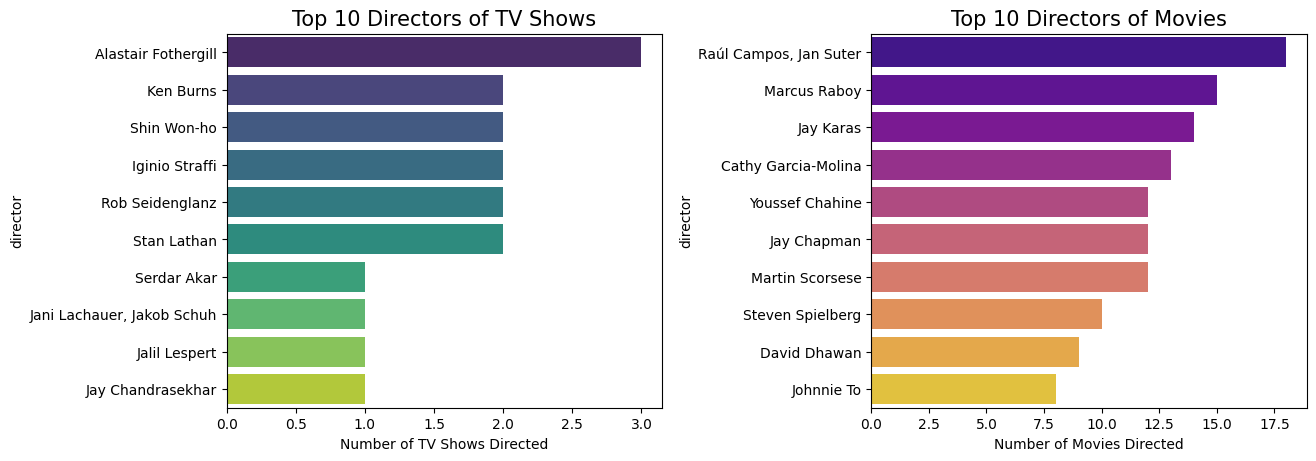

In [13]:
# Create a 1x2 subplot for TV Shows and Movies
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 directors who directed TV Shows
tv_shows = df[df['type'] == 'TV Show']['director'].value_counts()[:10]
sns.barplot(x=tv_shows.values, y=tv_shows.index, ax=ax[0], palette='viridis')
ax[0].set_title('Top 10 Directors of TV Shows', size=15)
ax[0].set_xlabel('Number of TV Shows Directed')

# Top 10 directors who directed Movies
movies = df[df['type'] == 'Movie']['director'].value_counts()[:10]
sns.barplot(x=movies.values, y=movies.index, ax=ax[1], palette='plasma')
ax[1].set_title('Top 10 Directors of Movies', size=15)
ax[1].set_xlabel('Number of Movies Directed')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

### <font color="Indianread"><b> **Observations:**

* The three shows directed by Alastair Fothergill are the highest-ranked in the dataset.
* Jan Suter and Raul Campos have each directed 18 films, which is more than any other director in the dataset.

In [14]:
# seperating actors from cast column to show unique values
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()[0:3]

,count
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30


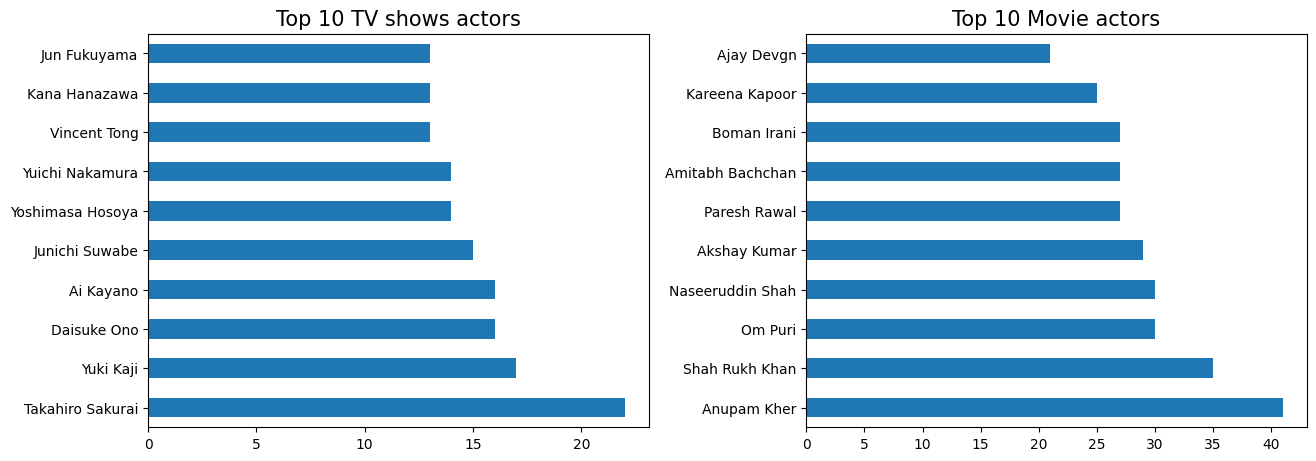

In [15]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

### <font color="Indianread"><b> **Observations:**

* The majority of roles in the movies are played by **Anupam Kher**, **Shahrukh Khan**, and **Om Puri**.
* In the shows, **Takahiro Sakurai**, **Yuki Kaji**, and **Daisuke Ono** have played the most roles.

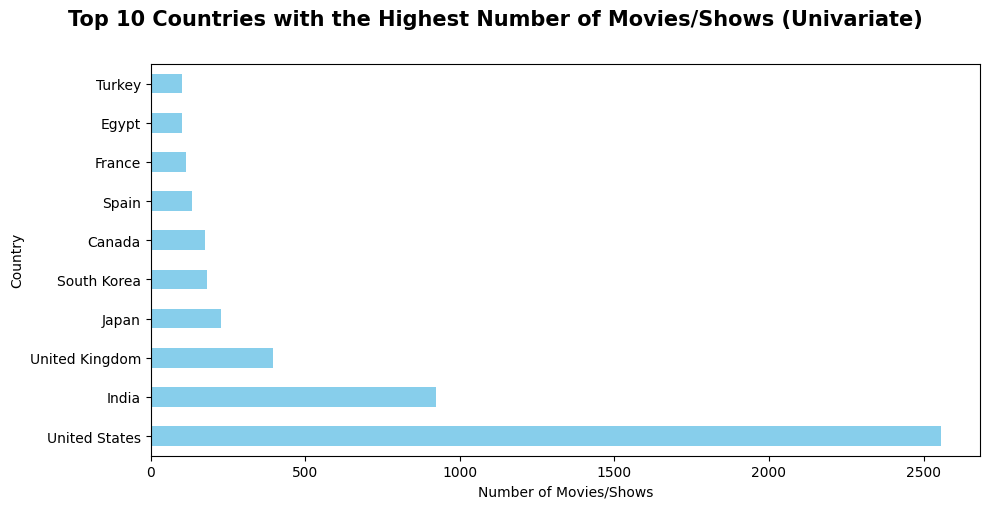

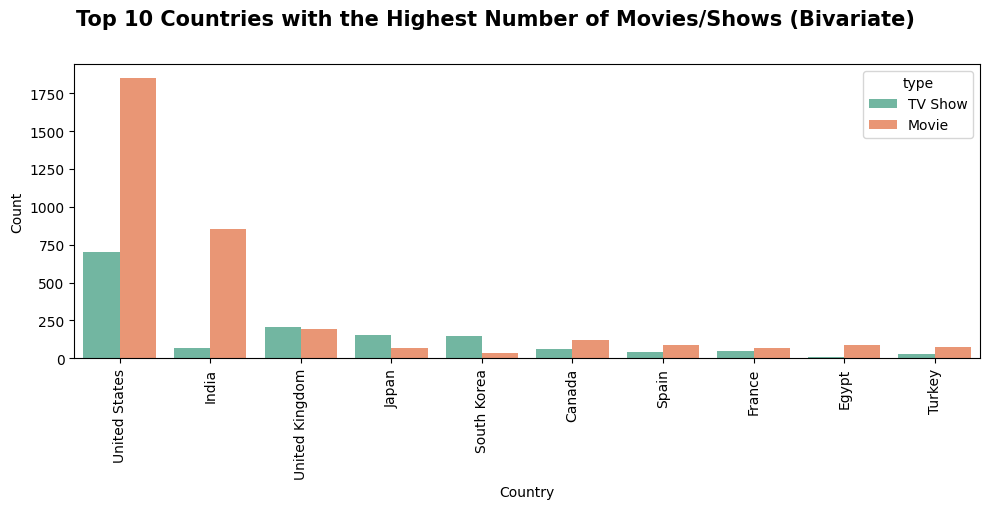

In [16]:
# Univariate analysis: Top 10 countries with the highest number of movies/shows
plt.figure(figsize=(10, 5))
plt.suptitle('Top 10 Countries with the Highest Number of Movies/Shows (Univariate)', weight='bold', size=15, y=1.01)
df['country'].value_counts().nlargest(10).plot(kind='barh', color='skyblue')  # Custom color
plt.xlabel('Number of Movies/Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Bivariate analysis: Top 10 countries with the highest number of movies/shows categorized by type
plt.figure(figsize=(10, 5))
plt.suptitle('Top 10 Countries with the Highest Number of Movies/Shows (Bivariate)', weight='bold', size=15, y=1.01)
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10],
                      palette='Set2')  # Using Seaborn's 'Set2' color palette
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### <font color="Indianread"><b> **Observations:**

* The **United States** has produced the highest number of movies and TV shows, followed by **India** and the **United Kingdom**.
* In both **India** and the **United States**, there are more **movies** than **TV shows**.
* In the **United Kingdom**, **Japan**, and **South Korea**, there are more **TV shows** than **movies**.

In [17]:
# number of unique values
df['release_year'].nunique()

73

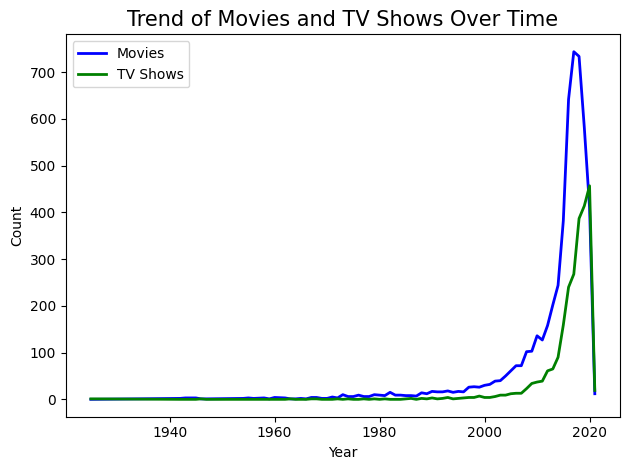

In [18]:
# Count the number of Movies and TV Shows per year
type_counts = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Create the line chart
plt.plot(type_counts.index, type_counts['Movie'], color='blue',  linestyle='-', linewidth=2, markersize=6, label='Movies')
plt.plot(type_counts.index, type_counts['TV Show'], color='green', linestyle='-', linewidth=2, markersize=6, label='TV Shows')

# Title and labels
plt.title('Trend of Movies and TV Shows Over Time', size=15)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

### <font color="Indianread"><b> **Observations:**

* Netflix started releasing more Movies/TV shows in recent years compared to older ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, with the highest number of releases in 2018.

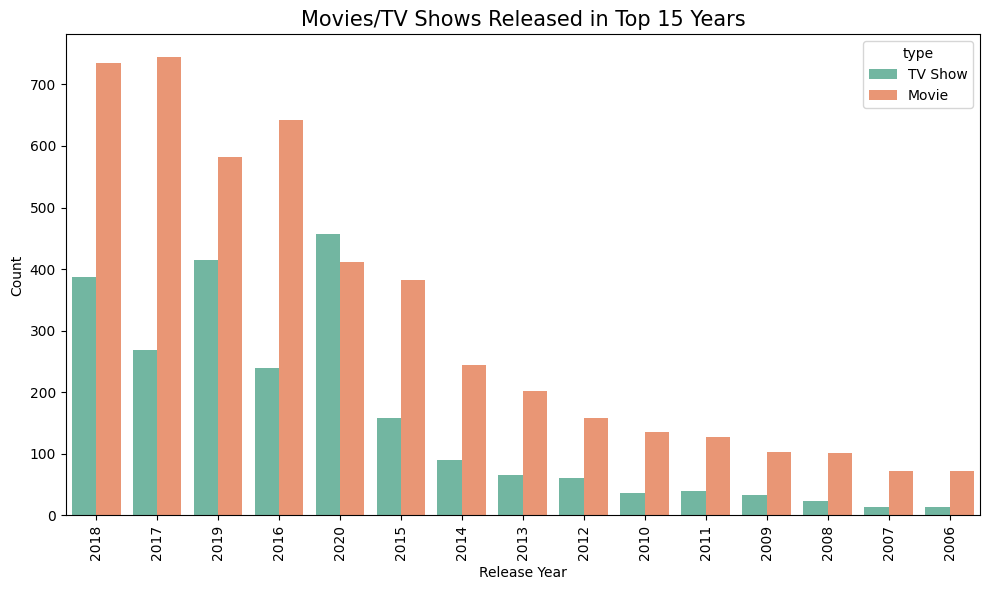

In [19]:
plt.figure(figsize=(10, 6))

# Bivariate analysis: Count plot of 'release_year' and 'type' for the top 15 years
count = sns.countplot(
    x="release_year",
    hue="type",
    data=df,
    order=df['release_year'].value_counts().index[:15],  # Select top 15 years by frequency
    palette="Set2"
)

# Customizing the plot
count.set_title('Movies/TV Shows Released in Top 15 Years', size=15)
count.set_xlabel('Release Year')
count.set_ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


### <font color="Indianread"><b> **Observations:**
    
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

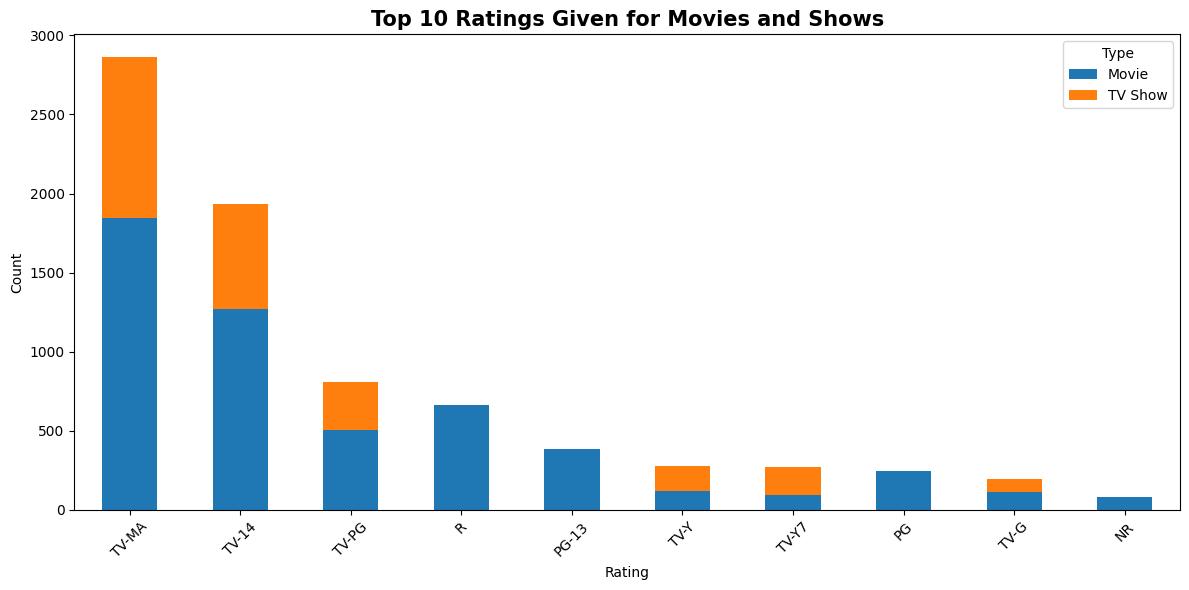

In [20]:
# Prepare data for stacked bar chart
rating_counts = df.groupby(['rating', 'type']).size().unstack(fill_value=0)
top_ratings = rating_counts.loc[rating_counts.sum(axis=1).nlargest(10).index]

# Plot stacked bar chart
top_ratings.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(12, 6))
plt.title('Top 10 Ratings Given for Movies and Shows', weight='bold', size=15)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')

plt.tight_layout()
plt.show()


### <font color="Indianread"><b> **Observations:**
    
* The majority of Movies and TV shows have a rating of TV-MA ("Mature Audience"), followed by TV-14 ("Younger Audience").
* Movies tend to receive the highest ratings more frequently than TV shows. This trend is expected, given the higher number of Movies compared to TV shows, as observed in the type column earlier.

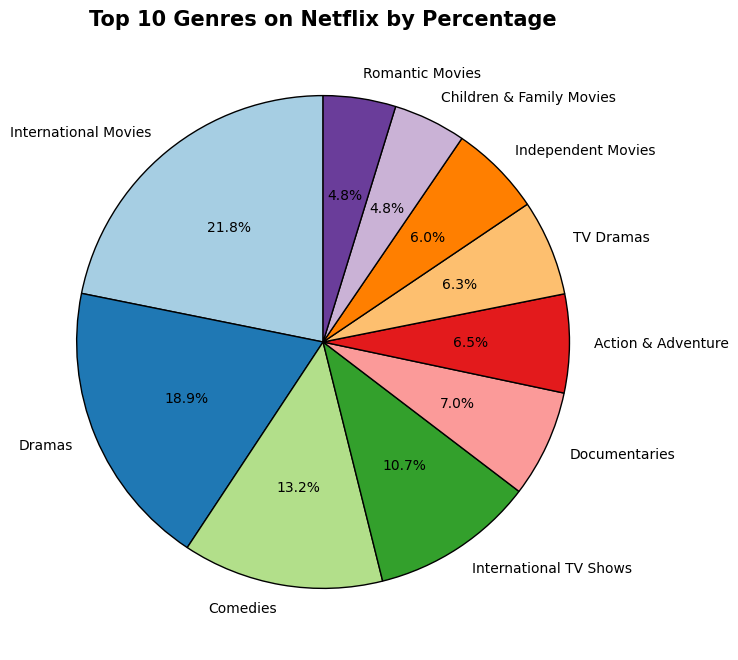

In [21]:
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

# Calculate the percentage for each genre
genres['percentage'] = (genres['count'] / genres['count'].sum()) * 100

# Plotting a pie chart with the top 10 genres by percentage
plt.figure(figsize=(10, 8))
plt.pie(
    genres['percentage'][:10],  # Top 10 genres
    labels=genres['genre'][:10],  # Genre labels
    autopct='%1.1f%%',  # Format to display percentage
    startangle=90,
    colors=plt.cm.Paired.colors,  # Optional color scheme
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Top 10 Genres on Netflix by Percentage', size=15, weight='bold')
plt.show()


### <font color="Indianread"><b> **Observations:**
    
* International Movies, Dramas, and Comedies are the most prevalent genres in the dataset.

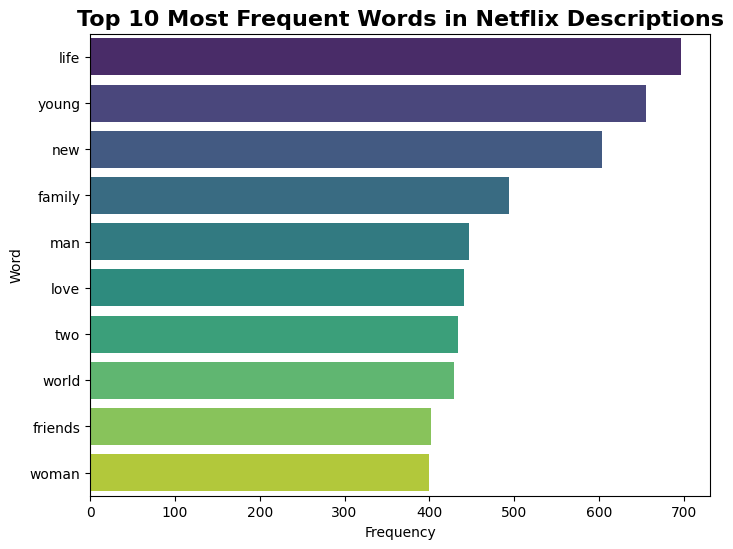

In [22]:
# Step 1: Clean and process the text to get word frequencies
text = " ".join(word for word in df['description']).lower()

# Remove non-alphabetic characters
text = re.sub(r'[^a-z\s]', '', text)

# Split into words, excluding stopwords and any remaining non-meaningful entries
words = [word for word in text.split() if word not in STOPWORDS and len(word) > 1]

# Count the frequency of each word
word_counts = Counter(words)
top_words = pd.DataFrame(word_counts.most_common(10), columns=['Word', 'Frequency'])

# Step 2: Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(y='Word', x='Frequency', data=top_words, palette='viridis')
plt.title('Top 10 Most Frequent Words in Netflix Descriptions', size=16, weight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


### <font color="Indianread"><b> **Observations:**

* Most occurring words in the description of the TV shows and movies are "Family," "Friend," "Love," "Life," "Woman," and "Man."

In [23]:
# Sample data
directors_list = df.director.value_counts().reset_index().head(10)[1:]
directors_list.rename(columns={'director': 'Directors name', 'count': 'Count'}, inplace=True)

In [24]:
# Create a horizontal bar chart with a different color scheme
fig1 = px.bar(directors_list, y='Directors name', x='Count', text_auto=True,
              color='Count', color_continuous_scale='Viridis', orientation='h')

fig1.update_traces(textposition='outside', cliponaxis=False)
fig1.update_layout(
    title={
        'text': 'Top 10 Directors with Highest Number of Movies and TV Shows',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the interactive bar chart
fig1.show()

### <font color="Indianread"><b> **Observations:**

* Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, and Jay Chapman are the top 5 directors with the highest number of movies and TV shows.

In [25]:
df['duration2'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration2']=df['duration2'].fillna(0)
df['duration2'] = df['duration2'].astype(int)
df['duration2']=np.where(df['duration'].str.contains('Seasons'),600,df['duration2'])
df['duration_category'] = pd.cut(df['duration2'],
                                 bins=[0, 120, 240, 480, 6000],
                                 labels=['Short', 'Medium', 'Long', 'Very Long'],
                                 right=False)

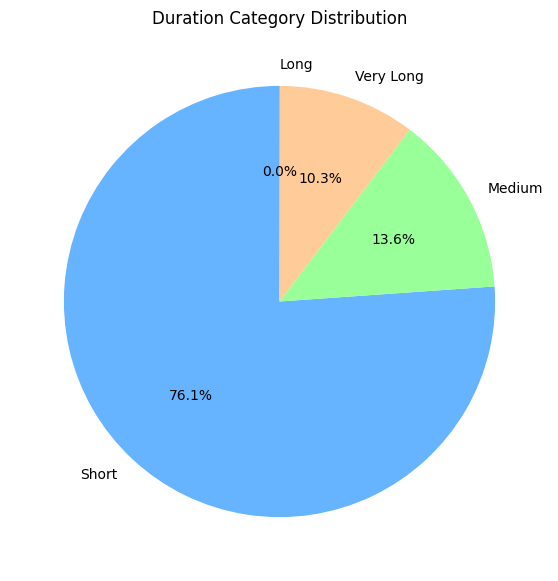

In [26]:
# Count the number of occurrences of each category in 'duration_category'
category_counts = df['duration_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])

# Add a title
plt.title('Duration Category Distribution')
plt.show()

### <font color="Indianread"><b> **Observations:**

* we can see 76% is short length 2-4 hours.

In [27]:
df['Cat_2']=np.where(df['duration'].str.contains('Seasons'),'Seasons','Non_Seasons')

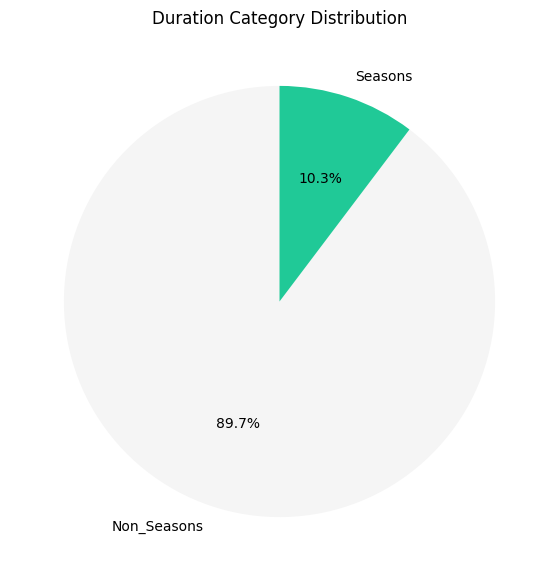

In [28]:
category_counts = df['Cat_2'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#f5f5f5','#20c997'])

# Add a title
plt.title('Duration Category Distribution')
plt.show()

### <font color="Indianread"><b> **Observations:**

* 90% is not a web series, web series get most watch time.


# <font color="Indianred"><b> **Data Cleaning**

In [29]:
# counting duplicate values
df.duplicated().sum()

0

In [30]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id                 0
type                    0
title                   0
director             2389
cast                  718
country               507
date_added             10
release_year            0
rating                  7
duration                0
listed_in               0
description             0
duration2               0
duration_category       0
Cat_2                   0
dtype: int64


In [31]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [32]:
# checking for null values after treating them.
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### <font color="Indianread"><b> **Handling Outliers**

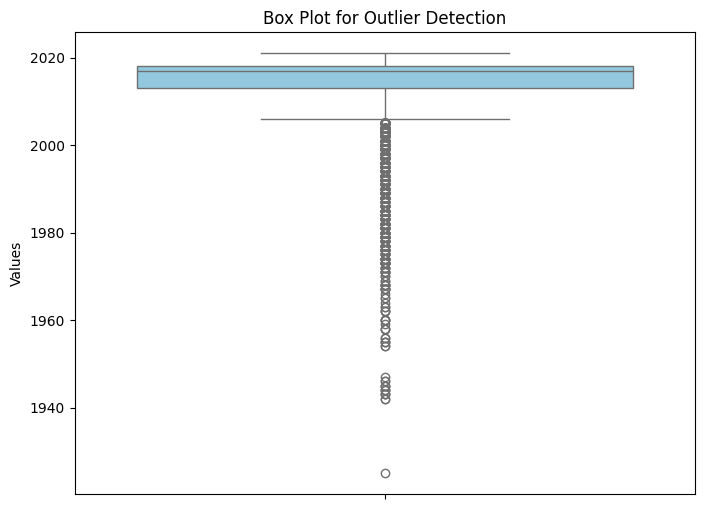

In [33]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='release_year', color='skyblue')
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.show()

### <font color="Indianread"><b> **Observations:**

* Except for the release year, almost all data in the dataset is in text format.
* The textual format provides the necessary data for building a clustering model, eliminating the need to handle outliers.

# <font color="Indianred"><b> Textual Data Preprocessing

## <font color="#20c997"><b> **1. Selecting Attributes**
The textual attributes chosen to analyze Netflix movies and shows are Director, Cast, Country, Rating, Genres, and Description. These attributes are combined into a single "tags" column for easier processing and model-building. This consolidation allows analysis of all relevant text in one column.

In [34]:
df['text_data'] = df['director'] + df['cast'] + df['country'] + \
                     df['rating'] + df['listed_in'] + df['description']

In [35]:
# checking the first row
df['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

## <font color="#20c997"><b>  2. Removing Stop Words and Lowercasing
Stop words (e.g., “the,” “is,” “a”) add little meaning and can clutter the data, so they are removed. Words are also converted to lowercase, which simplifies processing by reducing text variability due to capitalization.

In [36]:
#pip install scikit-learn
#!pip install nltk

In [37]:
stop_words = ['a', 'the', 'and', 'is', 'in', 'it', 'of', 'to']

In [38]:
from nltk.corpus import stopwords
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

df['text_data'] = df['text_data'].apply(stopwords)

## <font color="#20c997"><b>  3. Removing Punctuation
Removing punctuation marks reduces noise, helping algorithms focus on words themselves. Punctuation is stripped using a simple function.

In [39]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['text_data'] = df['text_data'].apply(remove_punctuation)

## <font color="#20c997"><b>4. Stemming
Stemming reduces words to their base form (e.g., “running” to “run”), treating words with the same root as equivalent, which simplifies vocabulary.

In [40]:
stemmer = SnowballStemmer("english")
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

df['text_data'] = df['text_data'].apply(stemming)

### <font color="#20c997"><b>5. Text Vectorization with TF-IDF
The TF-IDF (Term Frequency-Inverse Document Frequency) method converts text data into numerical vectors, assigning higher weights to relevant words. It’s a popular method as it considers the importance of words within and across documents.

In [41]:
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features=10000)
tfidf.fit(df['text_data'])
vector = tfidf.transform(df['text_data']).toarray()

### <font color="#20c997"><b>6. Dimensionality Reduction with PCA

In [42]:
# using PCA
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

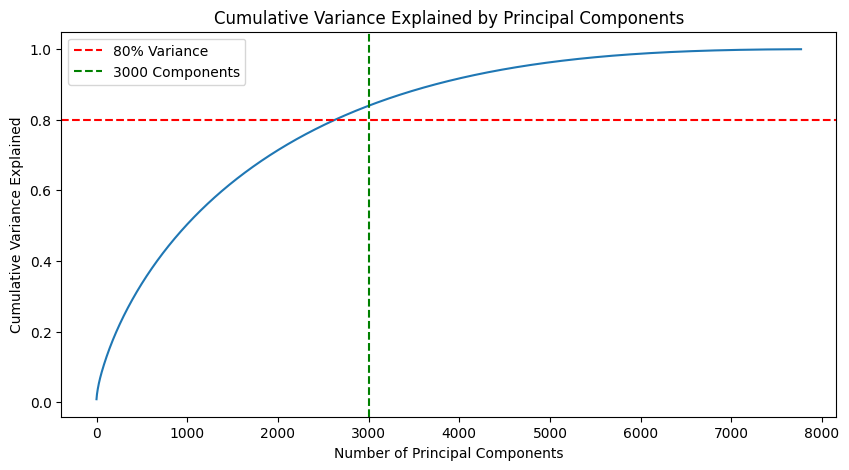

In [43]:
# Cumulative Explained Variance vs Number of Components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% Variance')
plt.axvline(x=3000, color='green', linestyle='--', label='3000 Components')
plt.legend()
plt.show()


### <font color="Indianread"><b> **Observations:**
* We found that nearly 7500 components capture 100% of the variance.
* Just 3000 components alone capture over 80% of the variance.
* Thus, selecting the top 3000 components allows us to reduce dimensionality and simplify the model, while still retaining more than 80% of the variance.

In [44]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [45]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

# <font color="Indianred"><b> **7. Model Implementation**

## <font color="#20c997"><b> **K-Means Clustering**

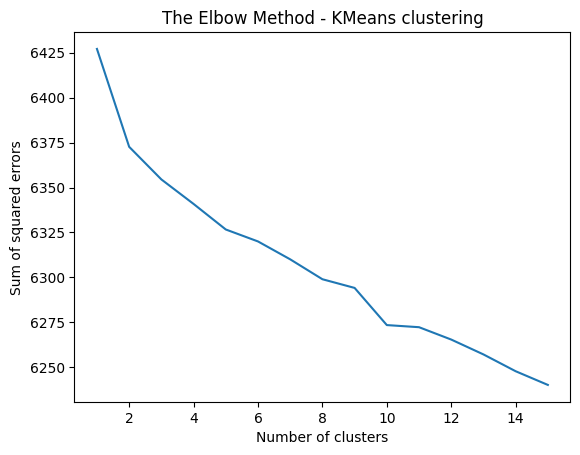

In [46]:
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

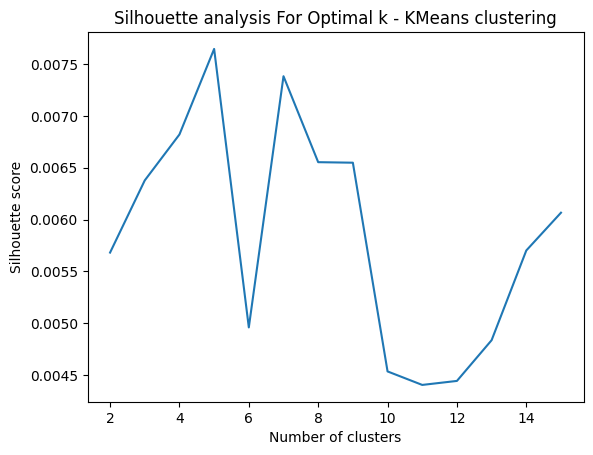

In [47]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

### <font color="Indianread"><b> **Observations:**
* The highest Silhouette score is obtained for 6 clusters.
* Building 6 clusters using the k-means clustering algorithm.

In [48]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=33)

In [49]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6320.075846797933, 0.004866213086632454)


In [50]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [51]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
4394,Movie,Naledi: A Baby Elephant's Tale,"Ben Bowie, Geoff Luck",,"United States, Botswana",TV-PG,Documentaries,Scientists and animal keepers fight to save an...,0
4608,Movie,Om Shanti Om,Farah Khan,"Shah Rukh Khan, Deepika Padukone, Shreyas Talp...",India,TV-14,"Comedies, Dramas, International Movies",Reincarnated 30 years after being killed in a ...,3
2323,Movie,G-Force,Hoyt Yeatman,"Bill Nighy, Will Arnett, Zach Galifianakis, Ke...",United States,PG,"Children & Family Movies, Comedies",When a billionaire sets out to take over the w...,5
6392,Movie,The Giant,"Aitor Arregi, Jon Garaño","Joseba Usabiaga, Eneko Sagardoy, Iñigo Aranbur...",Spain,TV-14,"Dramas, International Movies","In 1843, crippled Martin returns from war to h...",5
4136,TV Show,Miss in Kiss,,"Esther Wu, Dino Lee, Gong Yi Teng, Xi Wei Lun,...",Taiwan,TV-14,"International TV Shows, Romantic TV Shows, TV ...","A quirk of fate sends an ordinary, sweet-natur...",2


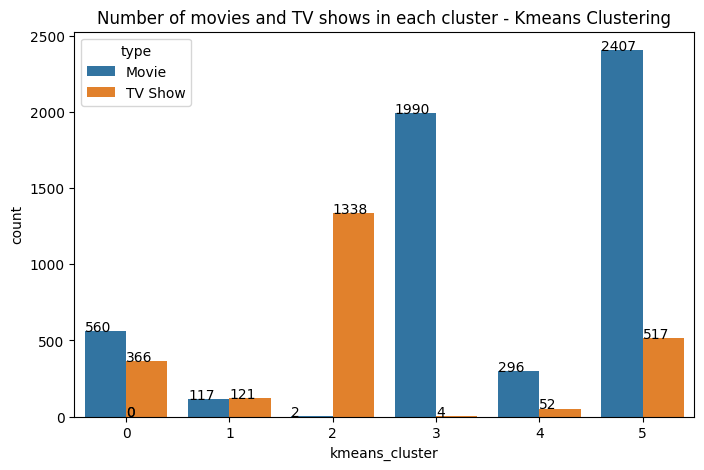

In [52]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### <font color="Indianread"><b> **Observations:**
* Successfully built 6 clusters using the k-means clustering algorithm.

### <font color="#20c997"><b> **Building wordclouds for different clusters in K-Means Clustering**

In [53]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

## <font color="#20c997"><b> **Hierarchical clustering**

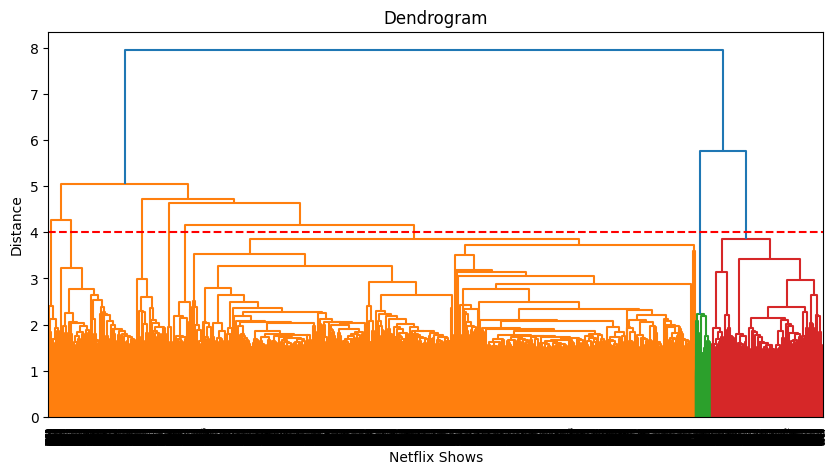

In [54]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

### <font color="Indianread"><b> **Observations:**
* At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.

In [58]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([1, 0, 1, ..., 0, 0, 0])

In [59]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [60]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
6720,Movie,The Old Thieves: The Legend of Artegios,Everardo González,,Mexico,TV-MA,"Documentaries, International Movies","While carrying out prison sentences, five noto...",0
4878,Movie,Planetarium,Rebecca Zlotowski,"Natalie Portman, Lily-Rose Depp, Emmanuel Sali...","France, Belgium",TV-MA,"Dramas, International Movies","In pre-World War II France, two sisters purpor...",0
7424,Movie,Violet Evergarden: Eternity and the Auto Memor...,Haruka Fujita,"Yui Ishikawa, Minako Kotobuki, Aoi Yuki",Japan,TV-PG,"Anime Features, International Movies, Sci-Fi &...",A lonely young woman feels trapped at her all ...,0
5032,Movie,Queen of the Desert,Werner Herzog,"Nicole Kidman, James Franco, Damian Lewis, Jay...","United States, Morocco",PG-13,Dramas,"Driven beyond the bounds of convention, advent...",0
4698,Movie,Our Shining Days,,"Lulu Xu, Yuchang Peng, Mingjie Luo, Yongxi Liu...",China,TV-PG,"Comedies, Dramas, International Movies","In a battle of the bands, a percussions studen...",1


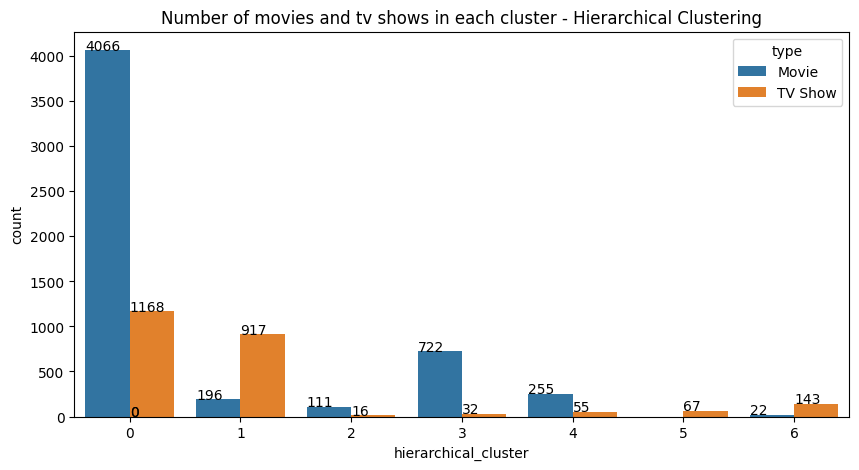

In [61]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### <font color="Indianread"><b> **Observations:**
* Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

#### <font color="#20c997"><b> **Building wordclouds for different clusters in hierarchical Clustering**

In [62]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

cluster 0


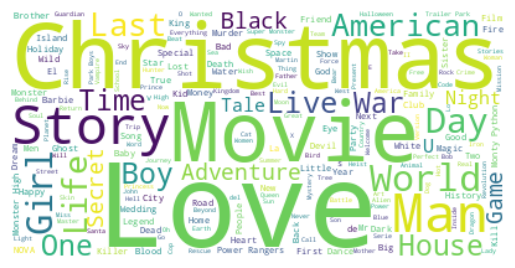

In [63]:
for i in range(1):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

# <font color="Indianred"><b> 8. Recommendation System

In [64]:
# veryfying index
df[['show_id', 'title', 'text_data']]

,show_id,title,text_data
0,s1,3%,joão miguel bianca comparato michel gome rodol...
1,s2,7:19,jorg michel graudemián bichir héctor bonilla o...
2,s3,23:59,gilbert chantedd chan stella chung henley hii ...
3,s4,9,shane ackerelijah wood john c reilli jennif co...
4,s5,21,robert luketicjim sturgess kevin spacey kate b...
...,...,...,...
7782,s7783,Zozo,josef faresimad creidi antoinett turk elia ger...
7783,s7784,Zubaan,mozez singhvicki kaushal sarahjan dia raaghav ...
7784,s7785,Zulu Man in Japan,nasti c tvmadocumentari intern movi music musi...
7785,s7786,Zumbo's Just Desserts,adriano zumbo rachel khooaustraliatvpgintern t...


### <font color="Indianread"><b> **Observations:**

* Our dataframe has a total of 7770 rows, as shown above, and the last index is 7786 due to the deletion of some rows while treating null values.

* In order to construct a content-based recommendation system, we determine the similarity score based on a specific index_id for that particular "tags" column.

* If we are unable to reset the index, there is a good chance that instead of providing an index, we will calculate cosine similarity for another index. in order to avoid this issue and properly address index when developing the recommendation system. The index was simply reset.

In [67]:
# defining new dataframe for building recommandation system
recommender_dataset = df.copy()

# reseting index
recommender_dataset.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_dataset[['show_id', 'title', 'text_data']]


,show_id,title,text_data
0,s1,3%,joão miguel bianca comparato michel gome rodol...
1,s2,7:19,jorg michel graudemián bichir héctor bonilla o...
2,s3,23:59,gilbert chantedd chan stella chung henley hii ...
3,s4,9,shane ackerelijah wood john c reilli jennif co...
4,s5,21,robert luketicjim sturgess kevin spacey kate b...
...,...,...,...
7765,s7783,Zozo,josef faresimad creidi antoinett turk elia ger...
7766,s7784,Zubaan,mozez singhvicki kaushal sarahjan dia raaghav ...
7767,s7785,Zulu Man in Japan,nasti c tvmadocumentari intern movi music musi...
7768,s7786,Zumbo's Just Desserts,adriano zumbo rachel khooaustraliatvpgintern t...


In [69]:
# dropping show-id and index
recommender_dataset.drop(columns=['index', 'show_id'], inplace=True)

In [71]:
# calling X
X

array([[ 0.15990256, -0.00860104, -0.00555901, ...,  0.00847911,
        -0.0028305 , -0.00435631],
       [-0.04119558,  0.01722246, -0.01672748, ...,  0.00168394,
        -0.00485796, -0.00030533],
       [-0.04105984,  0.03204712,  0.05437965, ..., -0.0005326 ,
         0.00042656,  0.0143236 ],
       ...,
       [-0.06613362,  0.00325864, -0.07550436, ...,  0.0107133 ,
        -0.00544932, -0.00550403],
       [ 0.05454009, -0.03255637, -0.03200883, ..., -0.01350563,
        -0.02529186,  0.00175622],
       [-0.07298493, -0.1490219 , -0.15896799, ...,  0.0010028 ,
         0.00173434,  0.00698091]])

In [72]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08018725,  0.01898014, ..., -0.02207294,
         0.00184767, -0.01815006],
       [ 0.08018725,  1.        , -0.00531671, ...,  0.06076747,
        -0.00970783, -0.01062332],
       [ 0.01898014, -0.00531671,  1.        , ..., -0.00436819,
        -0.01006978, -0.01628322],
       ...,
       [-0.02207294,  0.06076747, -0.00436819, ...,  1.        ,
        -0.00486721,  0.11832949],
       [ 0.00184767, -0.00970783, -0.01006978, ..., -0.00486721,
         1.        ,  0.0372514 ],
       [-0.01815006, -0.01062332, -0.01628322, ...,  0.11832949,
         0.0372514 ,  1.        ]])

In [76]:
def recommend(movie):
    print(f"If you liked '{movie}', you may enjoy: \n")

    # find out index position
    index = recommender_dataset[recommender_dataset['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [77]:
recommend('Inception')

If you liked 'Inception', you may enjoy: 

Apollo 18
Peaky Blinders
Solomon Kane
Æon Flux
Aamir
Dead in a Week (Or Your Money Back)
Lionheart
Dragonheart
The Titan
Cabins in the Wild with Dick Strawbridge


In [78]:
recommend('ABCD: Any Body Can Dance')

If you liked 'ABCD: Any Body Can Dance', you may enjoy: 

ABCD 2
A Flying Jatt
Haider
Main, Meri Patni Aur Woh
Raja Natwarlal
Aagey Se Right
Penalty
The Dark Side of Life: Mumbai City
Phamous
Mumbai Meri Jaan


In [79]:
# u can search any movie by some parth of string
df[df['title'].str.contains('boss')].title.unique()

array(['Girlboss'], dtype=object)

### <font color="Indianread"><b> **Conclusion:**

###  <font color="blue"><b> In this project, we addressed a text clustering challenge, aiming to classify and group Netflix shows into distinct clusters where shows within the same cluster exhibit similarities, while those in different clusters do not.
    
* The dataset comprised 7787 records and 11 attributes.

* We began by addressing missing values and conducting exploratory data analysis (EDA). It was observed that Netflix hosts more movies than TV shows, with the number of added shows growing exponentially. Most productions were created in the United States.

* Key attributes chosen for clustering included cast, country, genre, director, rating, and description. The TFIDF vectorizer was employed for tokenization, preprocessing, and vectorization, resulting in 10,000 attributes.
    
* To address dimensionality issues, we utilized Principal Component Analysis (PCA). By reducing the components to 3000, we retained over 80% of the variance.

* Clustering was first performed using the K-Means algorithm, with the optimal number of clusters determined to be 6 based on the elbow method and silhouette score analysis.

* We also applied the Agglomerative Clustering algorithm, identifying 7 as the optimal number of clusters through a dendrogram visualization.

* A content-based recommender system was constructed using a similarity matrix generated via cosine similarity. This system provides users with ten recommendations based on the type of show they watched.
    
This approach effectively combines clustering and recommendation techniques to deliver insights and enhance user experience.    